### Dependencies

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve2d
from skimage.metrics import mean_squared_error, structural_similarity as ssim

# Project 2 - Fun with Filters and Frequencies

## Part 1 - Fun with Filters

### Part 1.1 - Finite Difference Operators

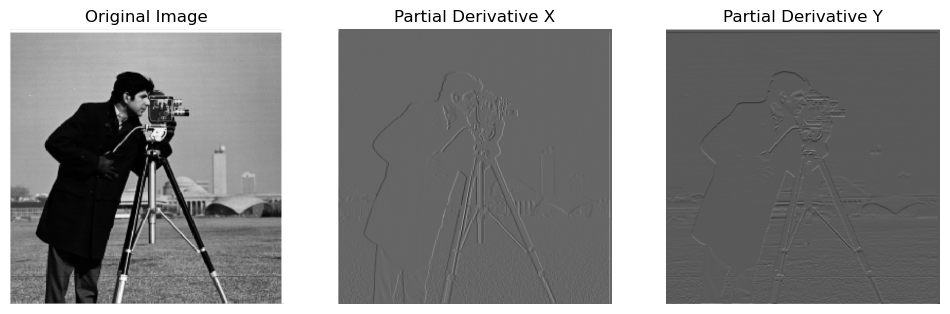

In [2]:
# Load the image
cameraman = plt.imread('../data/cameraman.png')
cameraman = np.mean(cameraman, axis = 2)

# Define finite difference operators
D_x = np.array([[1, -1]])
D_y = np.array([[1], [-1]])

# Compute partial derivatives
partial_derivative_x = convolve2d(cameraman, D_x, mode = 'same')
partial_derivative_y = convolve2d(cameraman, D_y, mode = 'same')

# Plot the original image and its partial derivatives
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.imshow(cameraman, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(partial_derivative_x, cmap='gray')
plt.title('Partial Derivative X')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(partial_derivative_y, cmap='gray')
plt.title('Partial Derivative Y')
plt.axis('off')

plt.show()

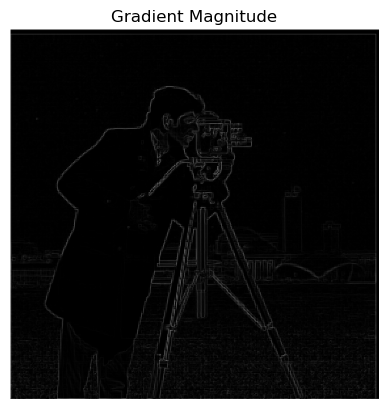

In [3]:
# Gradient magnitude
gradient_magnitude = np.sqrt(partial_derivative_x**2 + partial_derivative_y**2)

plt.imshow(gradient_magnitude, cmap = 'gray')
plt.title('Gradient Magnitude')
plt.axis('off')
plt.show()

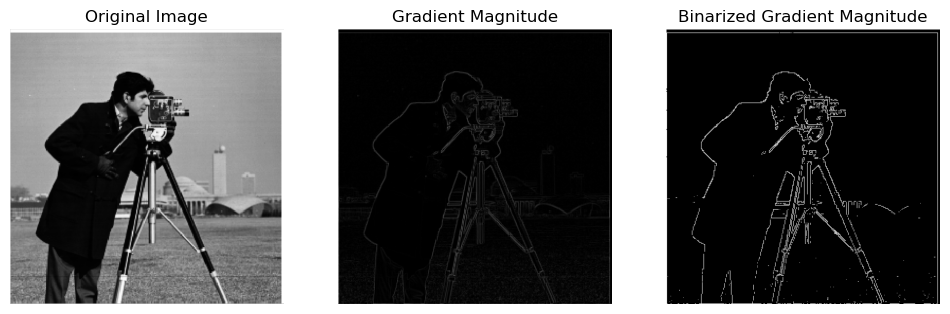

In [4]:
# Binarize the gradient magnitude image
threshold = 0.2
binary_cameraman_image = gradient_magnitude > threshold

# Plot the original image, gradient magnitude, and binary image
plt.figure(figsize = (12, 4))

plt.subplot(1, 3, 1)
plt.imshow(cameraman, cmap = 'gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(gradient_magnitude, cmap = 'gray')
plt.title('Gradient Magnitude')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(binary_cameraman_image, cmap = 'gray')
plt.title('Binarized Gradient Magnitude')
plt.axis('off')

plt.show()

### Part 1.2 - Derivative of Gaussian (DoG) Filter

In [5]:
# Create a 2D Guassian filter
sigma = 0.5         # Larger sigma for more intense blur
kernel_size = 5     # Larger kernel size for more intense blur
gaussian_1d = cv2.getGaussianKernel(kernel_size, sigma)

# 2D Gaussian filter
gaussian_2d = np.outer(gaussian_1d, gaussian_1d)

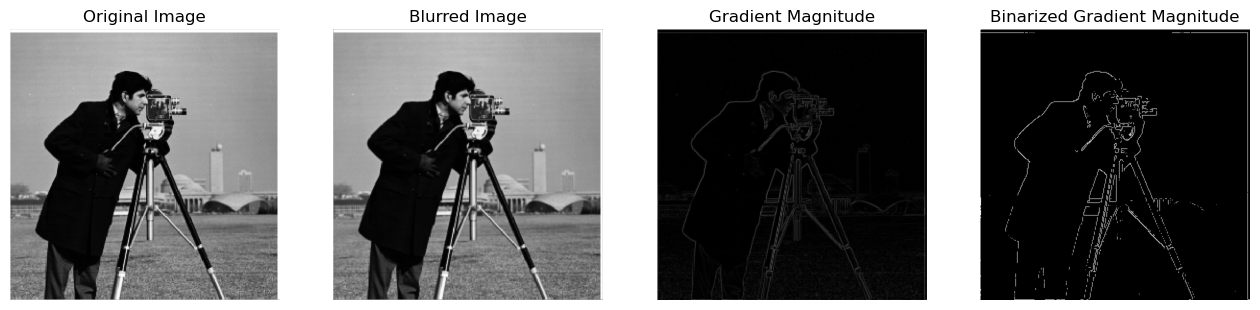

In [6]:
# Convolve the original image with the Gaussian filter to get a blurred image
blurred_image = convolve2d(cameraman, gaussian_2d, mode = 'same')

partial_derivative_x_blurred = convolve2d(blurred_image, D_x, mode = 'same')
partial_derivative_y_blurred = convolve2d(blurred_image, D_y, mode = 'same')

# Compute the gradient magnitude (should be a continuous image with gradients, not binary)
gradient_magnitude_blurred = np.sqrt(partial_derivative_x_blurred**2 + partial_derivative_y_blurred**2)

# Apply thresholding to create a binary edge map (optional step for edge detection)
threshold = 0.2  # Adjust this value based on your needs
binary_edge_cameraman_blurred = gradient_magnitude_blurred > threshold

# Plot the original image, blurred image, gradient magnitude, and binary image
plt.figure(figsize=(16, 4))

plt.subplot(1, 4, 1)
plt.imshow(cameraman, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 4, 2)
plt.imshow(blurred_image, cmap='gray')
plt.title('Blurred Image')
plt.axis('off')

plt.subplot(1, 4, 3)
plt.imshow(gradient_magnitude_blurred, cmap='gray')
plt.title('Gradient Magnitude')
plt.axis('off')

plt.subplot(1, 4, 4)
plt.imshow(binary_edge_cameraman_blurred, cmap='gray')
plt.title('Binarized Gradient Magnitude')
plt.axis('off')

plt.show()

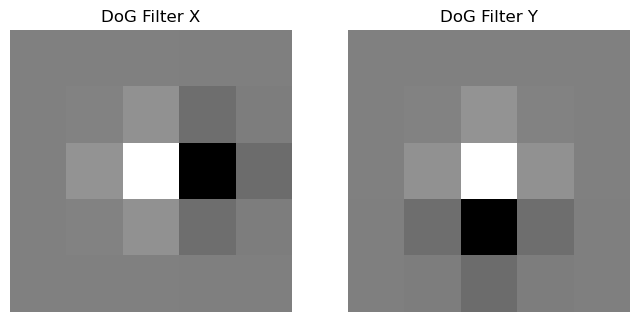

In [7]:
# Create DoG filters by convolving the Gaussian filter with D_x and D_y
DoG_x = convolve2d(gaussian_2d, D_x, mode = 'same')
DoG_y = convolve2d(gaussian_2d, D_y, mode = 'same')

# Display the resulting DoG filters
plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.imshow(DoG_x, cmap='gray')
plt.title('DoG Filter X')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(DoG_y, cmap='gray')
plt.title('DoG Filter Y')
plt.axis('off')

plt.show()

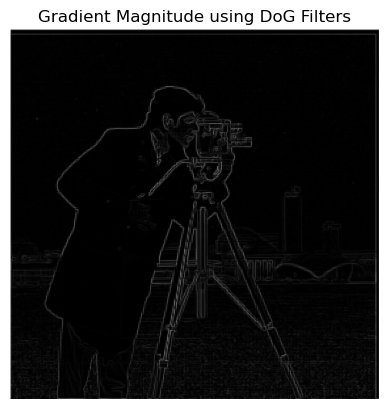

In [8]:
# Convolve the original image with DoG_x and DoG_y
grad_x_DoG = convolve2d(cameraman, DoG_x, mode = 'same')
grad_y_DoG = convolve2d(cameraman, DoG_y, mode = 'same')

# Compute the gradient magnitude
gradient_magnitude_DoG = np.sqrt(grad_x_DoG**2 + grad_y_DoG**2)

# Display the gradient magnitude image
plt.imshow(gradient_magnitude_DoG, cmap = 'gray')
plt.title('Gradient Magnitude using DoG Filters')
plt.axis('off')
plt.show()

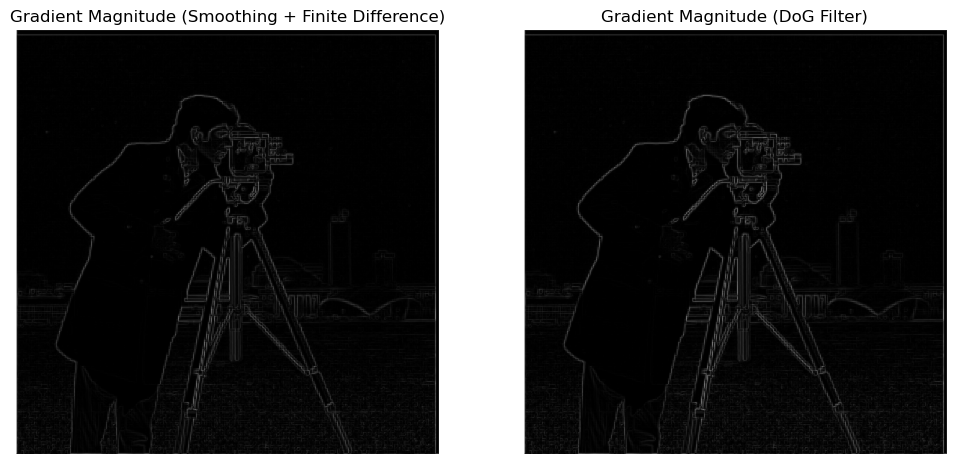

In [9]:
# Set up the figure to display images side by side
plt.figure(figsize=(12, 6))

# First subplot: Gradient magnitude with Gaussian smoothing + finite difference
plt.subplot(1, 2, 1)
plt.imshow(gradient_magnitude_blurred, cmap = 'gray')
plt.title('Gradient Magnitude (Smoothing + Finite Difference)')
plt.axis('off')

# Second subplot: Gradient magnitude with DoG filters
plt.subplot(1, 2, 2)
plt.imshow(gradient_magnitude_DoG, cmap = 'gray')
plt.title('Gradient Magnitude (DoG Filter)')
plt.axis('off')

# Display the comparison
plt.show()

# Part 2 - Fun with Frequencies

## Part 2.1 - Image "Sharpening"

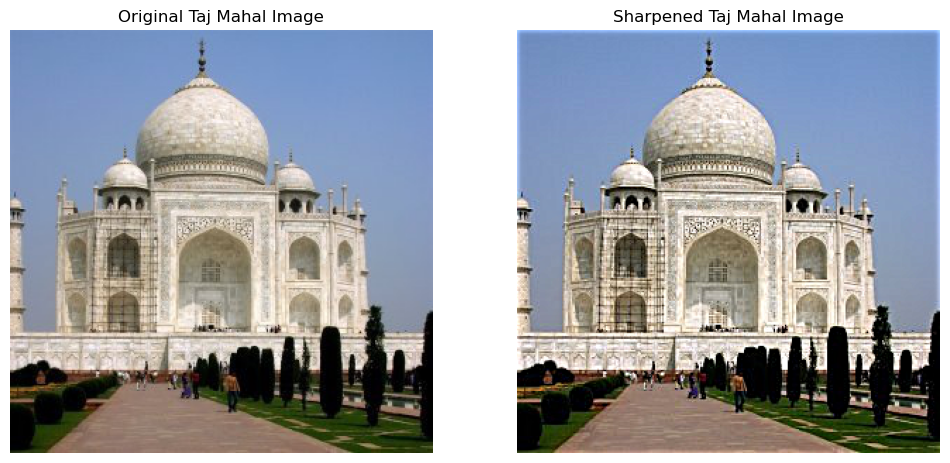

In [10]:
# Load the image (replace with your actual image path)
taj = plt.imread('../data/taj.jpg')

# Function to apply unsharp mask on each channel
def sharpen_image(image, sigma, alpha):
    # Normalize the image to be in the range [0, 1]
    image = image / 255.0
    
    sharpened_image = np.zeros_like(image)
    
    # Create the 1D Gaussian kernel
    kernel_size = int(6 * sigma) + 1  # Kernel size depends on sigma
    gaussian_1d = cv2.getGaussianKernel(kernel_size, sigma)
    
    # Create the 2D Gaussian kernel by taking the outer product
    gaussian_2d = np.outer(gaussian_1d, gaussian_1d)
    
    # Apply unsharp mask to each channel separately
    for i in range(3):  # For R, G, B channels
        blurred_channel = convolve2d(image[:, :, i], gaussian_2d, mode = 'same')
        details = image[:, :, i] - blurred_channel
        sharpened_image[:, :, i] = image[:, :, i] + alpha * details
    
    sharpened_image = np.clip(sharpened_image, 0, 1)
    
    return sharpened_image

sharpened_taj = sharpen_image(taj, sigma = 2.0, alpha = 0.75)

# Display the original and sharpened images side by side for comparison
plt.figure(figsize=(12, 6))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(taj)
plt.title('Original Taj Mahal Image')
plt.axis('off')

# Sharpened image
plt.subplot(1, 2, 2)
plt.imshow(sharpened_taj)
plt.title('Sharpened Taj Mahal Image')
plt.axis('off')

plt.show()


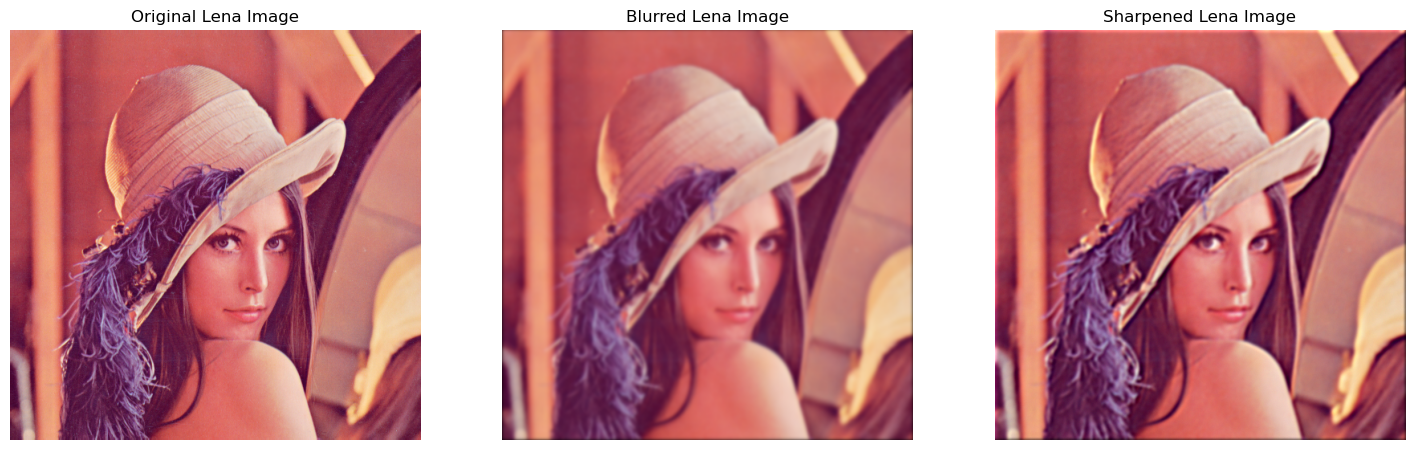

Mean Squared Error (MSE): 19766.202777618153
Structural Similarity Index (SSIM): 0.004593295071954444


In [11]:
# Load the image
lena = plt.imread('../data/lena.tiff')

def create_gaussian_kernel(kernel_size: int, sigma: float) -> np.ndarray:
    if kernel_size % 2 == 0:
        raise ValueError('Kernel size must be an odd number')
                         
    gaussian_1d = cv2.getGaussianKernel(kernel_size, sigma)
    gaussian_2d = np.outer(gaussian_1d, gaussian_1d)
    
    return gaussian_2d

gaussian_2d = create_gaussian_kernel(kernel_size = 15, sigma = 2.0)

# Blur each channel of the image
blurred_lena = np.zeros_like(lena)
for i in range(3):
    blurred_lena[:, :, i] = convolve2d(lena[:, :, i], gaussian_2d, mode='same')

# Sharpen the image again
sharpened_lena = sharpen_image(blurred_lena, sigma = 1.2, alpha = 4.0)

# Compute MSE and SSIM
mse_value = mean_squared_error(lena, sharpened_lena)
ssim_value = ssim(lena, sharpened_lena, multichannel=True, win_size=7, channel_axis=2, data_range=lena.max() - lena.min())

# Display the original, blurred images and sharpened side by side for comparison
plt.figure(figsize=(18, 6))

# Original image
plt.subplot(1, 3, 1)
plt.imshow(lena)
plt.title('Original Lena Image')
plt.axis('off')

# Blurred image
plt.subplot(1, 3, 2)
plt.imshow(blurred_lena)
plt.title('Blurred Lena Image')
plt.axis('off')

# Sharpened image
plt.subplot(1, 3, 3)
plt.imshow(sharpened_lena)
plt.title('Sharpened Lena Image')
plt.axis('off')

plt.show()

# Print MSE and SSIM values
print(f'Mean Squared Error (MSE): {mse_value}')
print(f'Structural Similarity Index (SSIM): {ssim_value}')

## Part 2.2: Hybrid Images

In [12]:
%matplotlib qt

In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from align_image_code import align_images  # Your existing code for image alignment

# Define the function to create hybrid images
def hybrid_image(im1, im2, sigma1, sigma2, bw = False):
    # Step 1: Apply a low-pass filter (Gaussian blur) to the first image
    low_frequencies = cv2.GaussianBlur(im2, (0, 0), sigma2)
    
    # Step 2: Apply a high-pass filter to the second image by subtracting a blurred version from the original
    blurred_im1 = cv2.GaussianBlur(im1, (0, 0), sigma1)
    high_frequencies = im1 - blurred_im1

    # Step 3: Combine the two images (add them together)
    hybrid = np.clip(low_frequencies + high_frequencies, 0, 1)  # Ensure values stay in range [0, 1]
    
    return hybrid

# Define the function to plot pyramids (Gaussian and Laplacian pyramids)
def pyramids(image, num_levels):
    # Create Gaussian pyramid
    gaussian_pyramid = [image]
    for i in range(num_levels - 1):
        gaussian_pyramid.append(cv2.pyrDown(gaussian_pyramid[-1]))
    
    # Create Laplacian pyramid
    laplacian_pyramid = []
    for i in range(num_levels - 1):
        expanded = cv2.pyrUp(gaussian_pyramid[i+1])
        laplacian = cv2.subtract(gaussian_pyramid[i], expanded)
        laplacian_pyramid.append(laplacian)
    
    # Plot the pyramids
    fig, axes = plt.subplots(2, num_levels, figsize=(15, 5))
    
    for i in range(num_levels):
        axes[0, i].imshow(gaussian_pyramid[i], cmap='gray')
        axes[0, i].set_title(f'Gaussian Level {i+1}')
        axes[0, i].axis('off')
        
        if i < num_levels - 1:
            axes[1, i].imshow(laplacian_pyramid[i], cmap='gray')
            axes[1, i].set_title(f'Laplacian Level {i+1}')
            axes[1, i].axis('off')
    
    plt.show()

# Main execution
if __name__ == "__main__":
    # Load the images (low and high-frequency components)
    im1 = plt.imread('../data/nutmeg.jpg') / 255.  # Low-frequency image
    im2 = plt.imread('../data/DerekPicture.jpg') / 255.  # High-frequency image
    
    # Align the images (using your provided code)
    im1_aligned, im2_aligned = align_images(im1, im2)

    # Set arbitrary sigma values for the filters
    sigma1 = 3  # High-pass filter (for im1)
    sigma2 = 5  # Low-pass filter (for im2)
    
    # Create the hybrid image
    hybrid = hybrid_image(im1_aligned, im2_aligned, sigma1, sigma2, bw=True)
    
    # Display the hybrid image
    plt.imshow(hybrid, cmap='gray')
    plt.title('Hybrid Image')
    plt.axis('off')
    plt.show()

    # Generate Gaussian and Laplacian pyramids for the hybrid image
    pyramids(hybrid, num_levels = 5)  # Adjust N to set the number of pyramid levels


Please select 2 points in each image for alignment.


2024-09-18 14:44:48.117 python[11806:391755] +[IMKClient subclass]: chose IMKClient_Legacy
2024-09-18 14:44:48.117 python[11806:391755] +[IMKInputSession subclass]: chose IMKInputSession_Legacy


error: OpenCV(4.10.0) /private/var/folders/k1/30mswbxs7r1g6zwn8y4fyt500000gp/T/abs_49s_p64pd6/croot/opencv-suite_1722029132360/work/modules/core/src/arithm.cpp:661: error: (-209:Sizes of input arguments do not match) The operation is neither 'array op array' (where arrays have the same size and the same number of channels), nor 'array op scalar', nor 'scalar op array' in function 'arithm_op'
